#### Preparação de dados e avaliação de modelo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"nome": ['Peter', 'Bruce', 'T\'Challa'],
                   "simbolo": ['aranha', 'morcego', 'pantera'],
                   "idade": [22, pd.NaT, 25]})

In [3]:
df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [5]:
df.dropna()

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


In [6]:
df.dropna(inplace=True)

In [7]:
df

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


# RMSE

In [8]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]


In [9]:
diferencas = []

for idx in range(len(reais)):
    diferencas.append(reais[idx] - prev[idx])

diferencas


[5000, 8000, -10000, 5000, -15000]

In [10]:
diferencas = []

for r, p in zip(reais, prev):
    diferencas.append(r - p)

diferencas


[5000, 8000, -10000, 5000, -15000]

In [11]:
diferencas = [r - p for r, p in zip(reais, prev)]

diferencas


[5000, 8000, -10000, 5000, -15000]

In [12]:
quadrados_das_diferencas = [d ** 2 for d in diferencas]

quadrados_das_diferencas


[25000000, 64000000, 100000000, 25000000, 225000000]

In [13]:
mse = np.mean(quadrados_das_diferencas)

In [14]:
mse

np.float64(87800000.0)

In [15]:
mrse = np.sqrt(mse)

In [16]:
mrse

np.float64(9370.165420097983)

Códifo para o cálculo do RMSE com Scikit-Learn

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mse = mean_squared_error(reais, prev)

In [19]:
mse

np.float64(87800000.0)

In [20]:
mrse = np.sqrt(mse)

## Cálculo do MAPE (Mean Absolute Percent Error) - Erro Percentual Absoluto Médio (sem biblioteca)

In [1]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [3]:
erro_absoluto_percentual = []

In [4]:
for r, p in zip(reais, prev):
    erro_absoluto_percentual.append(abs(r - p) / r)

In [6]:
erro_absoluto_percentual

[0.05, 0.05333333333333334, 0.05, 0.02, 0.05]

In [5]:
mape = (sum(erro_absoluto_percentual) / len(erro_absoluto_percentual)) * 100


# Cálculo do MAPE (com a bíblioteca Schikit-Learn)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [10]:
mape_com_bibliotecas = mean_absolute_percentage_error(reais, prev)


In [11]:
mape_com_bibliotecas * 100

np.float64(4.466666666666667)

# Imputação de valores faltantes

In [12]:
from sklearn.impute import SimpleImputer

In [15]:
# Dados com valores ausentes
dados = np.array([[1, 2, 3, np.nan],
                  [4, np.nan, 6, 7],
                  [8, 2, 5, 7],
                  [8, 11, 10, 10]])

In [16]:
dados

array([[ 1.,  2.,  3., nan],
       [ 4., nan,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

In [17]:
imputador = SimpleImputer(strategy='mean')

In [18]:
dados_imputados = imputador.fit_transform(dados)

In [20]:
dados_imputados

array([[ 1.,  2.,  3.,  8.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

In [21]:
imputador = SimpleImputer(strategy='most_frequent')

In [22]:
dados_imputados_2 = imputador.fit_transform(dados)

In [23]:
dados_imputados_2

array([[ 1.,  2.,  3.,  7.],
       [ 4.,  2.,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

# Identificação de Outliers

In [24]:
dados = np.array([1, 2, 3, 4, 5, 100])

In [25]:
dados

array([  1,   2,   3,   4,   5, 100])

In [26]:
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)
iqr = q3 - q1

In [28]:
iqr

np.float64(2.5)

In [29]:
# Limite inferior e superior
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr


In [30]:
limite_inf, limite_sup

(np.float64(-1.5), np.float64(8.5))

In [31]:
outliers = np.where((dados < limite_inf) | (dados > limite_sup))[0]


In [33]:
outliers[0]

np.int64(5)

In [35]:
dados[outliers[0]]

np.int64(100)

# Remoção do Outlier

In [36]:
np.delete(dados, 5)

array([1, 2, 3, 4, 5])

# Lista em Python

In [37]:
lista = [10, 20, 30, 40, 50]

In [38]:
lista

[10, 20, 30, 40, 50]

In [39]:
lista[0]

10

In [40]:
lista[4]

50

In [41]:
lista[-1]

50

In [42]:
len(lista)

5

# Normalização dos dados de uma lista

In [43]:
from sklearn.preprocessing import normalize

In [45]:
dados

array([2, 3, 5, 6, 7, 4, 8, 7, 6, 0])

In [46]:
dados_normalizados = normalize([dados], norm='max')

In [48]:
dados_normalizados

array([[0.25 , 0.375, 0.625, 0.75 , 0.875, 0.5  , 1.   , 0.875, 0.75 ,
        0.   ]])

# Padronização dos dados

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
dados = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [51]:
dados

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
padronizador = StandardScaler()

In [53]:
dados_padronizados = padronizador.fit_transform(dados)

In [54]:
dados_padronizados

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

# Codificação com one-hot enoding e label encoding

In [55]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [56]:
dados_categóricos = np.array(['A', 'B', 'C', 'A', 'B'])

In [57]:
dados_categóricos

array(['A', 'B', 'C', 'A', 'B'], dtype='<U1')

In [58]:
codific_one_hot = OneHotEncoder()

In [59]:
dados_one_hot = codific_one_hot.fit_transform(dados_categóricos.reshape(-1, 1))


In [60]:
dados_one_hot

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [61]:
print(f"Dados one-hot encoding:\n{dados_one_hot.toarray()}")

Dados one-hot encoding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


# Label Encoding

In [62]:
dados_categóricos = np.array(['A', 'B', 'C', 'A', 'B'])

In [63]:
codificador_label = LabelEncoder()

In [64]:
dados_label = codificador_label.fit_transform(dados_categóricos)

In [65]:
print(f"Dados label encoding:\n{dados_label}")

Dados label encoding:
[0 1 2 0 1]


# Cálculo das métricas de acurácia, precisão, revocação e f1-score

## Exemplo relacionado a testes médicos de COVID-19.

Imagine que temos um teste de diagnóstico para COVID-19 e uma população de 1000 pessoas para testar. Dessas 1000 pessoas, 200 estão realmente infectadas com o vírus e 800 estão saudáveis.

### Aqui estão as definições:

**Verdadeiro Positivo (VP):**  
Um verdadeiro positivo ocorre quando o resultado do teste é positivo e a pessoa realmente está infectada.  
No nosso exemplo, se o teste identificar corretamente 150 das 200 pessoas infectadas como positivas, teremos 150 verdadeiros positivos.

**Verdadeiro Negativo (VN):**  
Um verdadeiro negativo ocorre quando o resultado do teste é negativo e a pessoa realmente não está infectada.  
Se o teste corretamente identificar 700 das 800 pessoas não infectadas como negativas, teremos 700 verdadeiros negativos.

**Falso Positivo (FP):**  
Um falso positivo ocorre quando o resultado do teste é positivo, mas a pessoa não está realmente infectada.  
Se, digamos, 50 das pessoas saudáveis forem erroneamente identificadas como positivas, teremos 50 falsos positivos.

**Falso Negativo (FN):**  
Um falso negativo ocorre quando o resultado do teste é negativo, mas a pessoa está realmente infectada.  
Se, por exemplo, 50 das pessoas infectadas forem erroneamente identificadas como negativas, teremos 50 falsos negativos.

## Aqui está um resumo dos números no nosso exemplo:

- Pessoas infectadas (realmente positivas): **200**
- Pessoas não infectadas (realmente negativas): **800**
- Verdadeiros Positivos (VP): **150**
- Verdadeiros Negativos (VN): **700**
- Falsos Positivos (FP): **50**
- Falsos Negativos (FN): **50**



In [66]:
total = 1000
vp = 150
vn = 700
fp = 50
fn = 50


# Acurácia

In [72]:
acuracia = (vp + vn) / total
acuracia

0.85

# Precisão

In [70]:
precisao = vp / (vp + fp)
precisao

0.75

# Revocação

In [73]:
revocacao = vp / (vp + fn)
revocacao

0.75

# F1-Score

In [74]:
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
f1_score

0.75

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [76]:
y_real = [1, 0, 1, 0]

In [77]:
# Previsões do modelo (código de obtenção das previsões do modelo)
y_pred = [0, 1, 1, 1]

In [78]:
# Métricas de avaliação
print(f'Acurácia: {accuracy_score(y_real, y_pred)}')
print(f'Precisão: {precision_score(y_real, y_pred)}')
print(f'Revocação: {recall_score(y_real, y_pred)}')
print(f'F1-Score: {f1_score(y_real, y_pred)}')


Acurácia: 0.25
Precisão: 0.3333333333333333
Revocação: 0.5
F1-Score: 0.4


In [79]:
from sklearn.metrics import classification_report

In [80]:
target_names = ['class 0', 'class 1']

In [81]:
print(classification_report(y_real, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



# Matriz de Confusão

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
y_real_animais = ['cachorro', 'gato', 'cachorro', 'gato']
y_pred_animais = ['gato', 'cachorro', 'cachorro', 'cachorro']

In [84]:
confusion_matrix(y_real_animais, y_pred_animais)

array([[1, 1],
       [2, 0]])

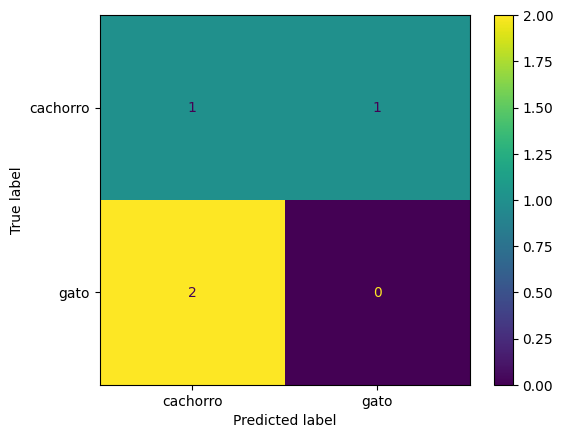

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_real_animais, y_pred_animais, labels=['cachorro', 'gato'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cachorro', 'gato'])
disp.plot()
plt.show()


In [86]:
tp, fn, fp, tn = confusion_matrix(['cachorro', 'gato', 'cachorro', 'gato'], 
                                  ['gato', 'cachorro', 'cachorro', 'cachorro']).ravel()
tp, fn, fp, tn


(np.int64(1), np.int64(1), np.int64(2), np.int64(0))